## A. Data Prepration

### A.1 Import LIbbary

In [502]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

### A.2 Import DataFrame

In [503]:
df = pd.read_csv('student-mat.csv')

### A.3 Tampilkan 5 DataFrame awal

In [504]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### A.4 Tampilkan 5 DataFrame akhir

In [505]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


### A.5 Check Dimensi pada DataFrame

In [506]:
print(f"Check Dimensi pada DatFrame : {df.shape}")

Check Dimensi pada DatFrame : (395, 33)


## B. Data Preprocessing

### B.1 Informasi pada DataFrame

In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### B.2 Jumlah Nilai unik pada DataFrame

In [508]:
print(f"Jumlah Nilai unik pada DataFrame : /n{df.nunique()}")

Jumlah Nilai unik pada DataFrame : /nschool         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64


### B.3 Check Data Duplicated pada DataFrame

In [509]:
print(f"Check Data Dupliacted pada DataFrame : {df.duplicated().sum()}")

Check Data Dupliacted pada DataFrame : 0


### B.4 Check Data Kosong pada DataFrame

In [510]:
print(f"Check Data Kosong pada DataFrame : {df.isna().sum().sum()}")

Check Data Kosong pada DataFrame : 0


### B.5 Check Outliers pada DataFrame

In [511]:
def remove_outlier(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  # batas bawah and batas atas
  lw = Q1 - 1.5 * IQR
  hg = Q3 + 1.5 * IQR
  # outlier
  outlier = df[(df[column] < lw) & (df[column] > hg)]
  return outlier

In [512]:
remove_outlier(df, column='G3')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


### B.6 Mengambil kolom yang di butuhkan saja

#### B.6.1 Check kolom yang ada di DataFrame

In [513]:
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


#### B.6.2 Menghapus kolom yang tidak di butuhkan

In [514]:
df = df.drop(columns=['age','school','address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2'], axis=1)

### B.6.3 Check Kolom yang ada di DataFrame kembali

In [515]:
print(df.columns)

Index(['sex', 'G3'], dtype='object')


### B.7 Chesk isi dari kolom sex

In [516]:
df['sex'].unique()

array(['F', 'M'], dtype=object)

#### B.7.1 Jumlah isi dari kolom sex

In [517]:
df['sex'].value_counts()

sex
F    208
M    187
Name: count, dtype: int64

### B.7.2 Mengubah nilai pada kolom sex menjadi Nunerik

In [518]:
df['sex'] = df['sex'].map({'M' : 0, 'F' : 1})

### B.7.3 Check Tipe data kolom sex

In [519]:
df['sex'].dtype

dtype('int64')

### B.8 Deskripsi pada DataFrame

In [520]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,395.0,0.526582,0.499926,0.0,0.0,1.0,1.0,1.0
G3,395.0,10.415190,4.581443,0.0,8.0,11.0,14.0,20.0


## C.Explolary Data Analis

### C.1 Visualisasi Boxplot

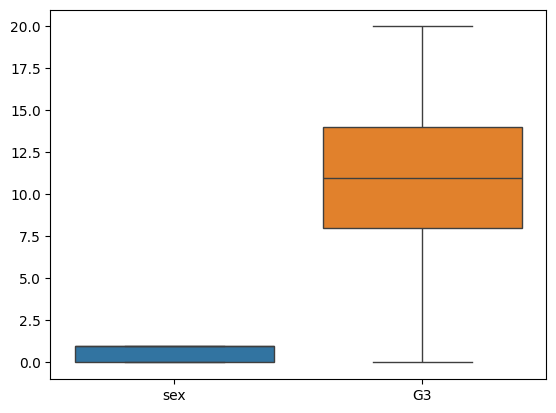

In [521]:
sns.boxplot(df)
plt.show()

### C.2 Visualusasi hist

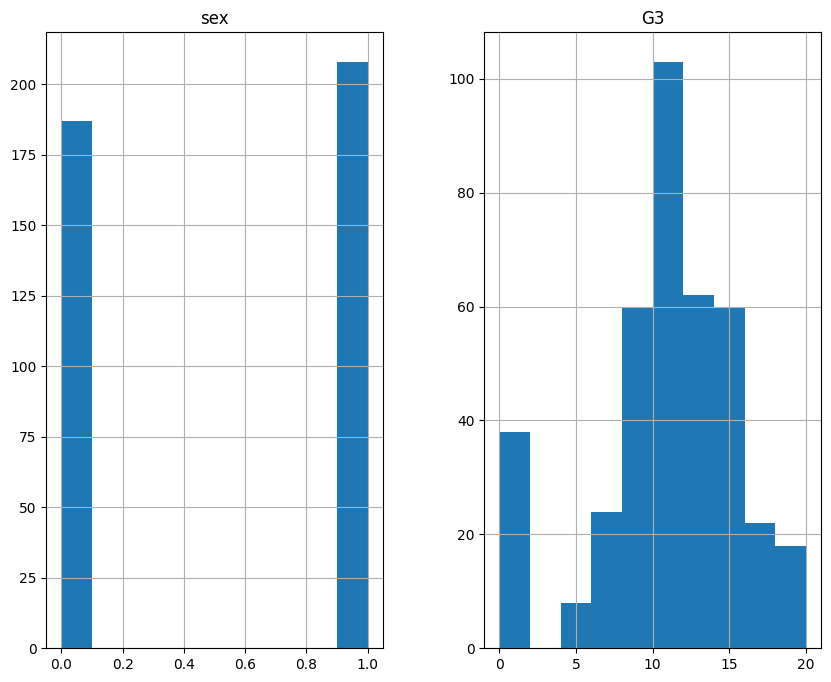

In [522]:
df.hist(figsize=(10, 8))
plt.show()

### C.3 Visualisasi Histogram

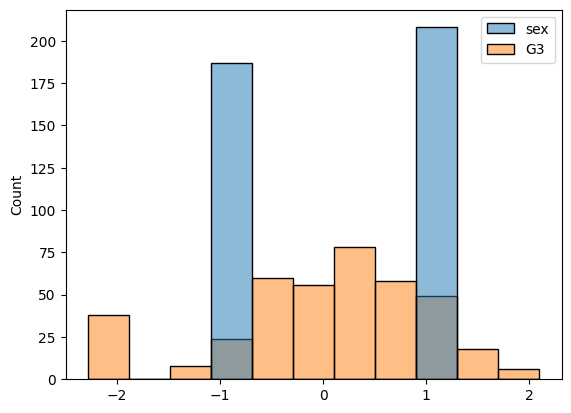

In [523]:
standarized = pd.DataFrame({})

for col in df:
  standarized[col] = (df[col] - np.mean(df[col], axis=0)) / np.std(df[col], axis=0)

sns.histplot(standarized)
plt.show()

### C.4 Visualuisasi Pie Char

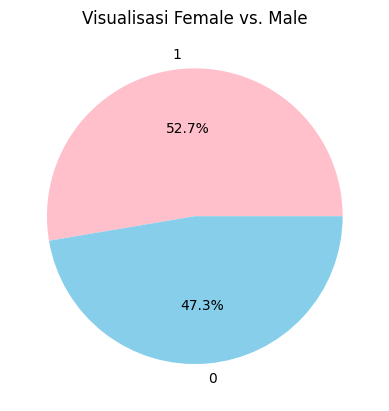

In [524]:
df_sex = df['sex'].value_counts()
plt.pie(df_sex.values, labels=df_sex.index, autopct='%1.1f%%', colors=['pink', 'skyblue'])
plt.title("Visualisasi Female vs. Male")
plt.show()

### C.5 Visualiasi KDE

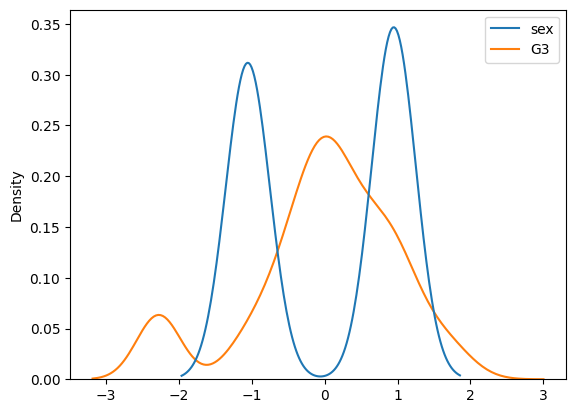

In [525]:
sns.kdeplot(standarized)
plt.show()

### C.6 Visualisasi Pairplot

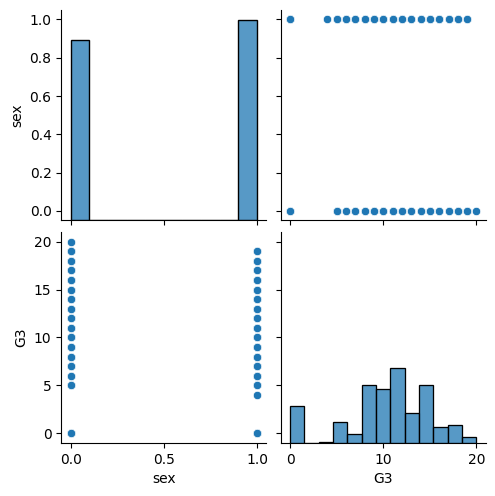

In [526]:
sns.pairplot(df)
plt.show()

## D. Pemodelan DataFrame

### D.1 Menentukan Indepent and Data Dependet

In [527]:
X = df.iloc[:, 0]
y = df.iloc[:, 1]

In [528]:
X

,sex
0,1
1,1
2,1
3,1
4,1
...,...
390,0
391,0
392,0
393,0


### D.2 Ubah dia menjadi array

In [529]:
X = np.array(X)
y = np.array(y)

In [530]:
X

array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
    

### D.3 Featur Scalling Min and max

In [531]:
def min_max(x):
  return (x - x.min() / x.max() - x.min())

### D.4 Pakai Fitur Scalling min and max

In [532]:
x = min_max(X)

### D.5 Split Data biasa

In [533]:
np.random.seed(42)
train_size = int(len(x) * 0.8)
idx = np.random.permutation(len(x))

x_train, x_test = x[idx[:train_size]], x[idx[train_size:]]
y_train, y_test = y[idx[:train_size]], y[idx[train_size:]]

### D.6 Hasil Split Data Training adn Testing

In [534]:
print(f"Hasil Data Training : {x_train.shape}, {y_train.shape}")
print(f"Hasil Data Testing : {x_test.shape}, {y_test.shape}")

Hasil Data Training : (316, 1), (316,)
Hasil Data Testing : (79, 1), (79,)


## E. Algoritma Simple Linear Regression

### E.1 Mengubah garis ke menjadi kolom

In [535]:
# x_tranpose = x.T

### E.2 Perkalian X.t dengan x

In [536]:
# x_tranpose_x = np.dot(x_tranpose, x)

In [537]:
# x_tranpose_x

### E.3 Perkalian X.t dengan y

In [538]:
# x_tranpose_y = np.dot(x_tranpose, y)

In [539]:
# x_tranpose_y

### E.4 Perhitungan slope and weights

In [540]:
slope = (len(x) * np.sum(x * y) - np.sum(x) * np.sum(y)) / (len(x) * np.sum(x**2) - np.sum(x)** 2)
weights =  (np.sum(y) - slope * np.sum(x)) / len(x)

### E.5 Hasil Perhitungan slope and weights

In [541]:
print(f"Hasil Perhitungan Slope : {slope}")
print(f"Hasil Perhitungan Weights : {weights}")

Hasil Perhitungan Slope : 8668.0
Hasil Perhitungan Weights : -4554.0


### E.6 Prediksi

In [542]:
y_pred = np.round(weights + slope * x_test)

### E.7 Evaluasi Model

In [543]:
r2 = 1 -(np.sum((y_test - y_pred)) ** 2 / np.sum((y_test - y_test.mean()) **2))
print(f"Hasil Evaluasi Model : {r2:.2f}%")

Hasil Evaluasi Model : -646343410.13%


### E.8 MSE

In [544]:
mse = np.sum((y_test - y_pred) ** 2)
print(f"Hasil MSE : {mse}")

Hasil MSE : 116455222182.0


### E.9 MAE

In [545]:
mae = np.sum(np.abs(y_test - y_pred))
print(f"Hasil MAE : {mae}")

Hasil MAE : 26921094.0


### E.10 Akurasi Model

In [546]:
akurasi = np.mean(y_pred == y_test) * 100
print(f"Akurasi {akurasi:.2f}%")

Akurasi 0.00%


### E.11 Visualisasi scatter plot

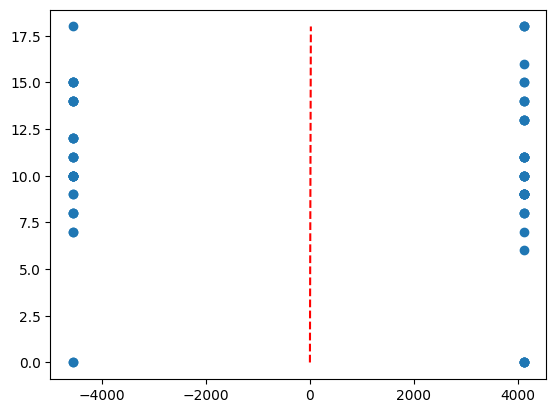

In [547]:
plt.scatter(y_pred, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.show()